# **DATA SCIENCE II - CODERHOUSE [61695]**

**ALUMNO: Marcos Daniel Amenabar**

**Introducción:** En este proyecto, analizamos un dataset de Spotify que abarca los lanzamientos de discos y la popularidad de los artistas desde 2007 hasta 2025. Nuestro objetivo es desentrañar los patrones de popularidad, identificar los países con mayor cantidad de lanzamientos y examinar cómo estos aspectos han evolucionado a lo largo del tiempo.

A través de este análisis, buscamos proporcionar una visión completa y detallada del panorama musical global y cómo los gustos musicales se han transformado en las últimas décadas. Utilizando técnicas de visualización de datos y análisis estadístico, exploramos cómo ha cambiado la popularidad de los artistas, qué países tienen la mayor cantidad de lanzamientos, y cómo la duración de las canciones ha evolucionado en los últimos años.

**Descripción del problema:** Para este análisis, contamos con una base de datos de aproximadamente 3287 filas y 20 columnas, obtenida a través de la API de Spotify. La base de datos contiene información relevante como el año de lanzamiento, el álbum, los mercados disponibles, la popularidad y la duración de las canciones. A lo largo de los años, Spotify ha reducido la cantidad de información compartida vía API, pero este dataset aún nos permite realizar un análisis significativo sobre la disponibilidad internacional y la popularidad de las canciones.

**Objetivo:** El objetivo principal es procesar y analizar la base de datos para obtener insights sobre la disponibilidad internacional de canciones y la popularidad de los artistas. Queremos identificar los países con mayor cantidad de lanzamientos, analizar la evolución de la popularidad de los artistas a lo largo del tiempo, y explorar la relación entre la duración de las canciones y su popularidad.


**Fuente:** Los datos utilizados en este trabajo fueron obtenidos a través de la API de Spotify.

# **INSTALACIÓN DE SPOTIPY**

In [ ]:
#Instalar Spotipy
!pip install spotipy

# **INSTALACIÓN DE PYCOUNTRY PARA PAÍSES**

In [ ]:
#Instalar pyCountry para paises.
!pip install pycountry


# **IMPORTACIÓN DE LIBRERÍA Y CARGA DE LOS DATOS**

In [ ]:
#Importaciones
import pandas as pd
import os
from collections import Counter
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import matplotlib.pyplot as plt
import seaborn as sns
import pycountry

# **ACCESO A LA API DE SPOTIFY**

In [ ]:
# Configuro mis credenciales
CLIENT_ID = 'b161377d5a3d416b97b6d8911ae1a36f'
CLIENT_SECRET = 'dd7e3ef5a7e14ee993cd2e543e0f1aad'

# Autenticación con la API de Spotify
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

# Obtener el Access Token
token_info = client_credentials_manager.get_access_token()
access_token = token_info['access_token']

print(f"Access Token: {access_token}")

Access Token: BQDHdBifEpJ3O2TJQdGZFFKMELST-iYNjhbG23l8VWV1hC2kUWWHq9gt7L9loyUGJRsn6wLZUQ3Fj_4FfRpNQMkxfU06G1OnXYWoHoCQnVWsnklP1EgJWQbURR02pO-sQEMIRdK9frY


<ipython-input-67-2bf679b3d5f5>:10: DeprecationWarning: You're using 'as_dict = True'.get_access_token will return the token string directly in future versions. Please adjust your code accordingly, or use get_cached_token instead.
  token_info = client_credentials_manager.get_access_token()


# **DATOS DEL CÓDIGO:**

Este bloque de código define una función get_top_tracks_by_year_canciones que obtiene las canciones más populares de un año específico, desde 2007 hasta 2025, utilizando la API de Spotify. La función maneja la paginación de los resultados y crea un DataFrame con las canciones obtenidas.

In [ ]:
#Definir top canciones
def get_top_tracks_by_year_canciones(year, limit=50):

    offset = 0
    results = []

    while True:
        response = sp.search(q=f'year:{year} top tracks', limit=limit, offset=offset)
        tracks = response['tracks']['items']
        results.extend(tracks)

        #Verificar si hay más páginas
        if 'next' not in response['tracks']:
            break

        #Actualizar el offset para la siguiente página
        offset += limit
        print (year, offset)
        if offset >= 160:
            break

    # Crear un DataFrame con los resultados
    df = pd.DataFrame(results)
    # Seleccionar las columnas de interés

    return df

**EXTRACCIÓN DE INFORMACIÓN**

In [ ]:
#Extraigo el DF de la API, añadiendo el AÑO(year) que no se encuentra en las columnas.
# Crear un DataFrame vacío con las columnas de interés
df = pd.DataFrame(columns=['year', 'album', 'artists', 'available_markets', 'disc_number', 'duration_ms',
                           'explicit', 'external_ids', 'external_urls', 'href', 'id', 'is_local',
                           'is_playable', 'name', 'popularity', 'preview_url', 'track_number',
                           'type', 'uri'])
# Iterar a través de los años desde 2007 hasta 2025 para extraer los datos
for year in range(2007, 2026):
  # Obtener los datos de las canciones más populares del año
  year_data = get_top_tracks_by_year_canciones(year)
  # Añadir una columna 'year' con el año correspondiente
  year_data['year'] = year
  # Concatenar los datos obtenidos al DataFrame principal
  df = pd.concat([df, year_data], ignore_index=True)

2007 50
2007 100
2007 150
2007 200
2008 50
2008 100
2008 150
2008 200
2009 50
2009 100
2009 150
2009 200
2010 50
2010 100
2010 150
2010 200
2011 50
2011 100
2011 150
2011 200
2012 50
2012 100
2012 150
2012 200
2013 50
2013 100
2013 150
2013 200
2014 50
2014 100
2014 150
2014 200
2015 50
2015 100
2015 150
2015 200
2016 50
2016 100
2016 150
2016 200
2017 50
2017 100
2017 150
2017 200
2018 50
2018 100
2018 150
2018 200
2019 50
2019 100
2019 150
2019 200
2020 50
2020 100
2020 150
2020 200
2021 50
2021 100
2021 150
2021 200
2022 50
2022 100
2022 150
2022 200
2023 50
2023 100
2023 150
2023 200
2024 50
2024 100
2024 150
2024 200
2025 50
2025 100
2025 150
2025 200


In [ ]:
#Guardo los datos extraidos desde la API a un .csv
#df.to_csv('top_canciones_2007_2025.csv', index=False)

In [ ]:
#Carga del dataset desde el enlace de GitHub
#url = 'https://raw.githubusercontent.com/MarcosDAmenabar/DataScienceII/refs/heads/main/top_canciones_2007_2025.csv'
#df = pd.read_csv(url)

In [ ]:
#Muestro la info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               3288 non-null   object
 1   album              3288 non-null   object
 2   artists            3288 non-null   object
 3   available_markets  3288 non-null   object
 4   disc_number        3288 non-null   object
 5   duration_ms        3288 non-null   object
 6   explicit           3288 non-null   object
 7   external_ids       3288 non-null   object
 8   external_urls      3288 non-null   object
 9   href               3288 non-null   object
 10  id                 3288 non-null   object
 11  is_local           3288 non-null   object
 12  is_playable        3288 non-null   object
 13  name               3288 non-null   object
 14  popularity         3288 non-null   object
 15  preview_url        0 non-null      object
 16  track_number       3288 non-null   object


**Observaciones:**

El DataFrame contiene 3287 entradas y 19 columnas.
Todas las columnas tienen el tipo de dato 'object'.
La columna 'preview_url' está completamente vacía y será eliminada.

# EXTRACCIÓN DE NOMBRE DEL ARTISTA

In [ ]:
#Sacar el nombre del artista
def extract_artist_name(artists_list):
    if artists_list: # Verificar si la lista de artistas no está vacía
        return artists_list[0]['name'] # Devolver el nombre del primer artista en la lista
    else:
        return None # Devolver None si la lista está vacía

In [ ]:
#Se mete en columna artistas y chequea la lista del diccionario.
# Aplicar la función extract_artist_name a la columna 'artists' del DataFrame
# y almacenar los resultados en una nueva columna 'artist'
df['artist'] = df['artists'].apply(extract_artist_name)

In [ ]:
#Acá podemos visualizar como se ve añadido en la columna artist de manera correcta
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               3288 non-null   object
 1   album              3288 non-null   object
 2   artists            3288 non-null   object
 3   available_markets  3288 non-null   object
 4   disc_number        3288 non-null   object
 5   duration_ms        3288 non-null   object
 6   explicit           3288 non-null   object
 7   external_ids       3288 non-null   object
 8   external_urls      3288 non-null   object
 9   href               3288 non-null   object
 10  id                 3288 non-null   object
 11  is_local           3288 non-null   object
 12  is_playable        3288 non-null   object
 13  name               3288 non-null   object
 14  popularity         3288 non-null   object
 15  preview_url        0 non-null      object
 16  track_number       3288 non-null   object


**ELIMINACIÓN DE COLUMNA ARTISTS**

In [ ]:
#Elimino una columna del diccionario, en este caso "Artists" y dejo la nueva ya añadida llamada "Artist"
df = df.drop('artists', axis=1)

**VERIFICACIÓN DE LAS PRIMERAS FILAS DEL DATASET**


In [ ]:
# Verificación de las primeras filas del Dataset.
# Esto nos permite ver una muestra de los datos para asegurarnos de que la extracción y transformación se realizaron correctamente
df.head()

,year,album,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri,artist
0,2007,"{'album_type': 'album', 'artists': [{'external...","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",2,221893,False,{'isrc': 'QMFMF1542459'},{'spotify': 'https://open.spotify.com/track/3i...,https://api.spotify.com/v1/tracks/3ixsyhSP204p...,3ixsyhSP204pEyP1NejKF6,False,True,Fake Your Way to the Top - Accompaniment Backi...,0,None,2,track,spotify:track:3ixsyhSP204pEyP1NejKF6,Stage Stars
1,2008,"{'album_type': 'album', 'artists': [{'external...","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,243426,False,{'isrc': 'ushm90847789'},{'spotify': 'https://open.spotify.com/track/36...,https://api.spotify.com/v1/tracks/36GZ2Rtn22kh...,36GZ2Rtn22khUbfCKZ3Qoj,False,True,Top Model Chic,0,None,3,track,spotify:track:36GZ2Rtn22khUbfCKZ3Qoj,4 PM
2,2008,"{'album_type': 'compilation', 'artists': [{'ex...","[AG, AR, BA, BB, BR, BS, BZ, CA, CL, CO, CR, C...",1,261560,False,{'isrc': 'FR3EP0600070'},{'spotify': 'https://open.spotify.com/track/4W...,https://api.spotify.com/v1/tracks/4WafdytaSVgc...,4WafdytaSVgcUwmpp1k8vA,False,True,4ème top,0,None,21,track,spotify:track:4WafdytaSVgcUwmpp1k8vA,David Patrois Trio +2
3,2008,"{'album_type': 'album', 'artists': [{'external...","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,324146,False,{'isrc': 'QMFMF1546120'},{'spotify': 'https://open.spotify.com/track/38...,https://api.spotify.com/v1/tracks/382bUblQs1qe...,382bUblQs1qe77exrYzMYK,False,True,The Surrey with the Fringe on Top - Complete T...,0,None,2,track,spotify:track:382bUblQs1qe77exrYzMYK,Stage Stars
4,2008,"{'album_type': 'album', 'artists': [{'external...","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,324146,False,{'isrc': 'QMFMF1546134'},{'spotify': 'https://open.spotify.com/track/2W...,https://api.spotify.com/v1/tracks/2WSYt3YcMPGZ...,2WSYt3YcMPGZogEZkKaeH3,False,True,The Surrey with the Fringe on Top - Accompanim...,0,None,16,track,spotify:track:2WSYt3YcMPGZogEZkKaeH3,Stage Stars


In [ ]:
#Estructura y tipos de datos
#Ahora podemos ver que tiene una columna menos que es la de artists, y abajo del todo está artist.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               3288 non-null   object
 1   album              3288 non-null   object
 2   available_markets  3288 non-null   object
 3   disc_number        3288 non-null   object
 4   duration_ms        3288 non-null   object
 5   explicit           3288 non-null   object
 6   external_ids       3288 non-null   object
 7   external_urls      3288 non-null   object
 8   href               3288 non-null   object
 9   id                 3288 non-null   object
 10  is_local           3288 non-null   object
 11  is_playable        3288 non-null   object
 12  name               3288 non-null   object
 13  popularity         3288 non-null   object
 14  preview_url        0 non-null      object
 15  track_number       3288 non-null   object
 16  type               3288 non-null   object


**RESUMEN ESTADÍSTICO DEL DATASET**

In [ ]:
# Resumen estadístico
df.describe()

,year,album,available_markets,disc_number,duration_ms,explicit,external_ids,external_urls,href,id,is_local,is_playable,name,popularity,preview_url,track_number,type,uri,artist
count,3288,3288,3288,3288,3288,3288,3288,3288,3288,3288,3288,3288,3288,3288,0,3288,3288,3288,3288
unique,19,563,39,5,2764,2,3103,3204,3204,3204,1,1,2978,35,0,100,1,3204,1238
top,2016,"{'album_type': 'compilation', 'artists': [{'ex...","[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...",1,120000,False,{'isrc': 'QZTB92360479'},{'spotify': 'https://open.spotify.com/track/1i...,https://api.spotify.com/v1/tracks/1iNVTagmyLsb...,1iNVTagmyLsbmBF7lNqFXT,False,True,Austin,0,NaN,1,track,spotify:track:1iNVTagmyLsbmBF7lNqFXT,Guitar Tribute Players
freq,200,72,2311,3264,13,3130,7,2,2,2,3288,3288,7,2050,NaN,268,3288,2,372


**REVICIÓN DE VALORES NULOS**

In [ ]:
#Revición de valores nulos en el df
# Esto devuelve el número de valores nulos por columna, lo que ayuda a identificar columnas con datos faltantes
df.isnull().sum()

,0
year,0
album,0
available_markets,0
disc_number,0
duration_ms,0
explicit,0
external_ids,0
external_urls,0
href,0
id,0


La columna **"Preview_url"** se va a eliminar ya que no contiene datos y no tengo que hacer ningún reemplazo de datos ya que todas las demás tienen información relevante.

In [ ]:
# Elimino la columna "preview_url" del DataFrame
df = df.drop(columns=['preview_url'])

In [ ]:
# Verifico la estructura del DataFrame después de la eliminación
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               3288 non-null   object
 1   album              3288 non-null   object
 2   available_markets  3288 non-null   object
 3   disc_number        3288 non-null   object
 4   duration_ms        3288 non-null   object
 5   explicit           3288 non-null   object
 6   external_ids       3288 non-null   object
 7   external_urls      3288 non-null   object
 8   href               3288 non-null   object
 9   id                 3288 non-null   object
 10  is_local           3288 non-null   object
 11  is_playable        3288 non-null   object
 12  name               3288 non-null   object
 13  popularity         3288 non-null   object
 14  track_number       3288 non-null   object
 15  type               3288 non-null   object
 16  uri                3288 non-null   object


Como verán ya se encuentra eliminada dicha columna.

**CONVERSIÓN DE DURACIÓN DE MILISEGUNDOS A SEGUNDOS**

In [ ]:
# Convertirto la duración de milisegundos a segundos y agrego una nueva columna
df['duration_sec'] = df['duration_ms'] / 1000

In [ ]:
# Verifico la nueva columna de segundos para hacer mejores comparaciones con el tiempo.
df[['duration_ms', 'duration_sec']].head()

,duration_ms,duration_sec
0,221893,221.893
1,243426,243.426
2,261560,261.56
3,324146,324.146
4,324146,324.146


In [ ]:
# Muestro nuevamente el DataFrame para visualizar la nueva columna 'duration_sec'
# Esto nos permite confirmar que la columna se ha agregado correctamente y revisar una muestra de los datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               3288 non-null   object
 1   album              3288 non-null   object
 2   available_markets  3288 non-null   object
 3   disc_number        3288 non-null   object
 4   duration_ms        3288 non-null   object
 5   explicit           3288 non-null   object
 6   external_ids       3288 non-null   object
 7   external_urls      3288 non-null   object
 8   href               3288 non-null   object
 9   id                 3288 non-null   object
 10  is_local           3288 non-null   object
 11  is_playable        3288 non-null   object
 12  name               3288 non-null   object
 13  popularity         3288 non-null   object
 14  track_number       3288 non-null   object
 15  type               3288 non-null   object
 16  uri                3288 non-null   object


**VISUALIZACIÓN DE LOS PAÍSES DISPONIBLES**

In [ ]:
# Veo los países.
df['available_markets'].head()


,available_markets
0,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
1,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
2,"[AG, AR, BA, BB, BR, BS, BZ, CA, CL, CO, CR, C..."
3,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."
4,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C..."


**FUNCIÓN PARA MODIFICAR LISTA DE CÓDIGOS DE PAÍSES A NOMBRES DE PAÍSES**


In [ ]:
# Función para convertir códigos de países en nombres completos de países
def modificar_lista(lista_original):
    lista_modificada = [] #Inicializar una lista vacía para almacenar los nombres modificados
    # Iterar a través de cada elemento en la lista original
    for elemento in lista_original:
        if elemento == 'XK': #Verificar si el código del país es 'XK' (Kosovo)
            lista_modificada.append('Kosovo') #Añadir 'Kosovo' a la lista modificada
        else:
            try:
                #Intentar obtener el nombre del país a partir del código alpha-2
                lista_modificada.append(pycountry.countries.get(alpha_2=elemento).name)
            except:
                #Si ocurre un error, añadir el elemento original a la lista modificada
                lista_modificada.append(elemento)
    return lista_modificada #Devolver la lista modificada

**CONVERSIÓN DE CÓDIGOS DE PAÍSES A NOMBRES COMPLETOS**

In [ ]:
# Aplicar la función modificar_lista a la columna 'available_markets' del DataFrame
# y almacenar los resultados en una nueva columna 'available_markets_pais'
df['available_markets_pais'] = df['available_markets'].apply(modificar_lista)

**VISUALIZACIÓN DE LA COLUMNA AVAILABLE_MARKETS_PAIS**

In [ ]:
# Mostrar las filas de la columna 'available_markets_pais'
# Esto nos permite visualizar los nombres de los países donde están disponibles los mercados para cada canción.
df['available_markets_pais']

,available_markets_pais
0,"[Argentina, Australia, Austria, Belgium, Boliv..."
1,"[Argentina, Australia, Austria, Belgium, Boliv..."
2,"[Antigua and Barbuda, Argentina, Bosnia and He..."
3,"[Argentina, Australia, Austria, Belgium, Boliv..."
4,"[Argentina, Australia, Austria, Belgium, Boliv..."
...,...
3283,"[Argentina, Australia, Austria, Belgium, Boliv..."
3284,"[Argentina, Australia, Austria, Belgium, Boliv..."
3285,"[Argentina, Australia, Austria, Belgium, Boliv..."
3286,"[Argentina, Australia, Austria, Belgium, Boliv..."


In [ ]:
# Mostrar algunas filas de la columna 'available_markets'
print(df['available_markets'].head(10))


0    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
1    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
2    [AG, AR, BA, BB, BR, BS, BZ, CA, CL, CO, CR, C...
3    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
4    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
5    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
6    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
7    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
8    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
9    [AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...
Name: available_markets, dtype: object


**CANTIDAD DE LANZAMIENTO DE DISCOS POR PAÍS (2007-2025)**

In [ ]:
# Contar el número de canciones disponibles en cada país
canciones_por_pais = pd.Series([pais for sublist in df['available_markets_pais'] for pais in sublist]).value_counts()

# Mostrar los países con mayor lanzamiento de discos
canciones_por_pais

,count
United States,3288
Mexico,3207
Curaçao,3201
Dominican Republic,3200
Uruguay,3200
...,...
"Korea, Republic of",3018
Montenegro,2880
Serbia,2876
Kosovo,2876


Según la API de Spotyfi, **¿Cuales son los países con mayor cantidad de lanzamiento de discos?** Como se puede observar, en el ranking 1 figura United States con 3288, siguiendo con México en 3207, Curacao con 3194, Dominican Republic con 3193 y Uruguay en el 5to lugar con 3193.

**GRÁFICO CIRCULAR DE LOS 5 PAÍSES CON MAYOR CANTIDAD DE LANZAMIENTOS (2007-2025)**

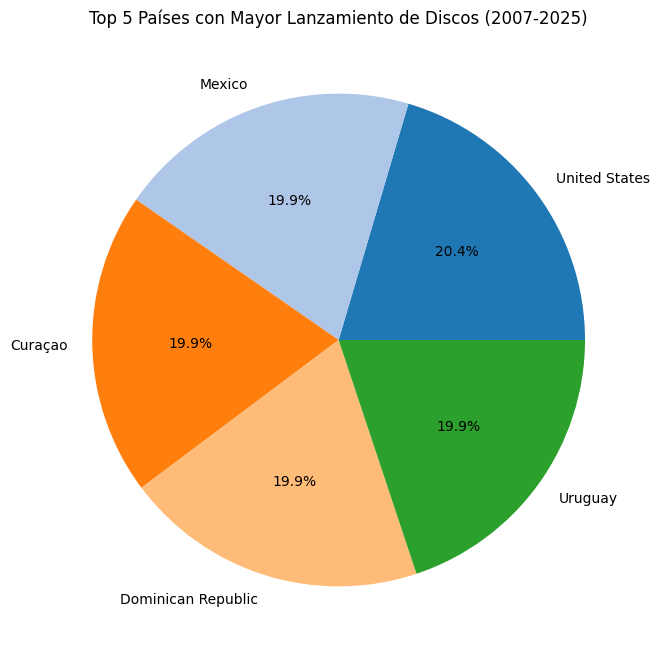

In [ ]:
# Contar el número de canciones disponibles en cada país
# Desplegar los países de cada lista de la columna 'available_markets_pais' y contar sus ocurrencias
canciones_por_pais = pd.Series([pais for sublist in df['available_markets_pais'] for pais in sublist]).value_counts()

# Seleccionar los 5 países con mayor cantidad de lanzamientos
top_5_countries = canciones_por_pais.head(5)

# Datos para el gráfico circular
countries = top_5_countries.index
counts = top_5_countries.values

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=countries, autopct='%1.1f%%', colors=plt.cm.tab20.colors[:5])
plt.title('Top 5 Países con Mayor Lanzamiento de Discos (2007-2025)')
plt.show()




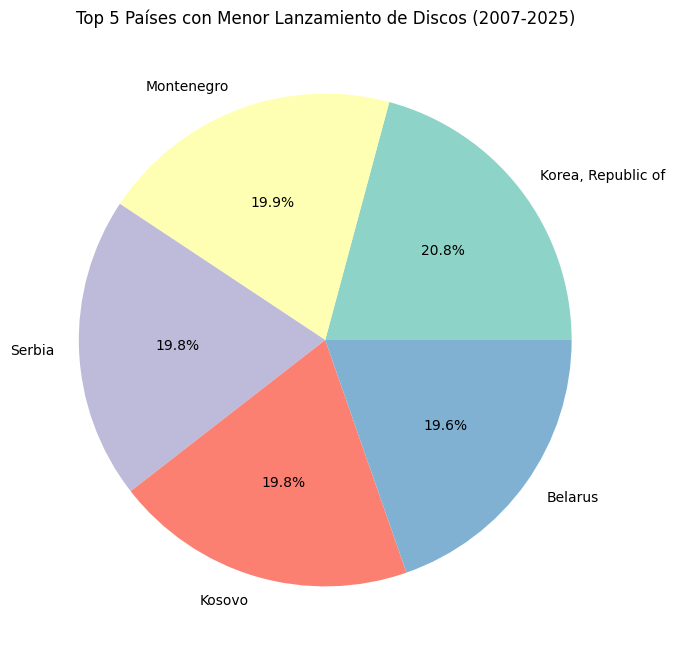

In [ ]:
# Contar el número de canciones disponibles en cada país
# Desplegar los países de cada lista de la columna 'available_markets_pais' y contar sus ocurrencias
canciones_por_pais = pd.Series([pais for sublist in df['available_markets_pais'] for pais in sublist]).value_counts()

# Seleccionar los 5 países con menor cantidad de lanzamientos
bottom_5_countries = canciones_por_pais.tail(5)

# Datos para el gráfico circular
countries = bottom_5_countries.index
counts = bottom_5_countries.values

# Crear el gráfico circular
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=countries, autopct='%1.1f%%', colors=plt.cm.Set3.colors[:5])
plt.title('Top 5 Países con Menor Lanzamiento de Discos (2007-2025)')
plt.show()


Según la API de Spotify, **¿Cuáles son los países con menor cantidad de lanzamiento de discos?** Como se puede observar, en el ranking 1 figura Bielorrusia con 2841 lanzamientos, seguido de Kosovo con 2869 lanzamientos, Serbia con 2869 lanzamientos, Montenegro con 2873 lanzamientos y República de Corea en el quinto lugar con 3011 lanzamientos.

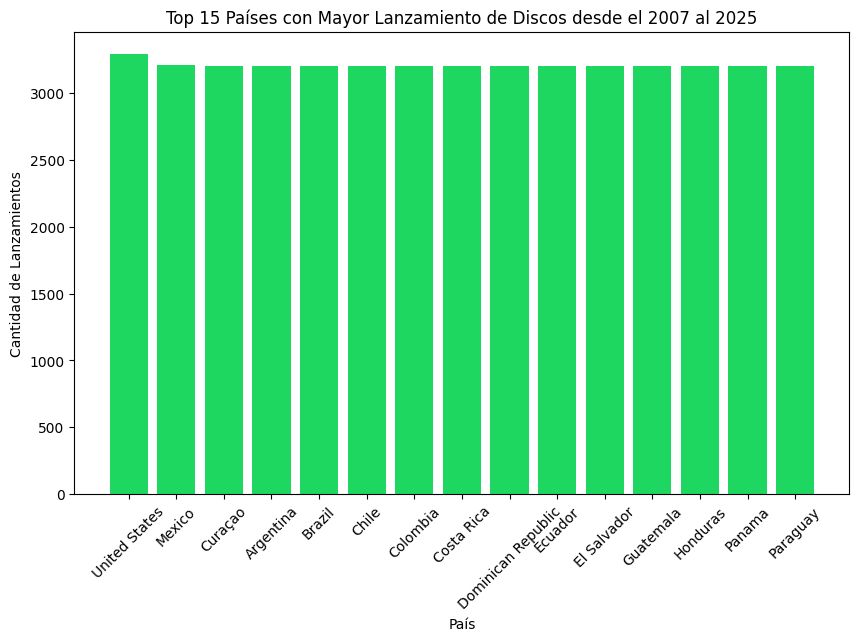

In [ ]:
# Contar las ocurrencias de cada país en la columna 'available_markets_pais'
country_counter = Counter([country for countries in df['available_markets_pais'] for country in countries])

# Seleccionar los 10 países con mayor cantidad de lanzamientos
top_countries = country_counter.most_common(15)

# Crear un DataFrame para los 15 países con mayor cantidad de lanzamientos
top_countries_df = pd.DataFrame(top_countries, columns=['Country', 'Count'])

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(top_countries_df['Country'], top_countries_df['Count'], color='#1ED760')
plt.xlabel('País')
plt.ylabel('Cantidad de Lanzamientos')
plt.title('Top 15 Países con Mayor Lanzamiento de Discos desde el 2007 al 2025')
plt.xticks(rotation=45)
plt.show()

Según la API de Spotify, **¿Cuáles son los países con mayor cantidad de lanzamiento de discos?** Como se puede observar, en el ranking 1 figura Estados Unidos con 3288 lanzamientos, seguido de México con 3207 lanzamientos, Curazao con 3194 lanzamientos, República Dominicana con 3193 lanzamientos y Uruguay en el quinto lugar con 3193 lanzamientos.

Este análisis revela que, salvo Estados Unidos, que claramente lidera la lista con una cantidad significativa de lanzamientos, la distribución de discos lanzados es bastante equitativa entre los otros países. La proximidad en las cifras de lanzamientos sugiere una competencia fuerte y una distribución casi homogénea en el mercado global de la música durante el período 2007-2025.

**VERIFICACIÓN DE COLUMNA AVAILABLE_MARKETS_PAIS AGREGADA.**

In [ ]:
# Verificar la estructura del DataFrame y ya se ve agregado available_markets_pais en la lista.
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3288 entries, 0 to 3287
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    3288 non-null   object
 1   album                   3288 non-null   object
 2   available_markets       3288 non-null   object
 3   disc_number             3288 non-null   object
 4   duration_ms             3288 non-null   object
 5   explicit                3288 non-null   object
 6   external_ids            3288 non-null   object
 7   external_urls           3288 non-null   object
 8   href                    3288 non-null   object
 9   id                      3288 non-null   object
 10  is_local                3288 non-null   object
 11  is_playable             3288 non-null   object
 12  name                    3288 non-null   object
 13  popularity              3288 non-null   object
 14  track_number            3288 non-null   object
 15  type

In [ ]:
# Verificación las primeras filas del DataFrame con la columna 'available_markets_pais'
df[['available_markets', 'available_markets_pais']].head()


,available_markets,available_markets_pais
0,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...","[Argentina, Australia, Austria, Belgium, Boliv..."
1,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...","[Argentina, Australia, Austria, Belgium, Boliv..."
2,"[AG, AR, BA, BB, BR, BS, BZ, CA, CL, CO, CR, C...","[Antigua and Barbuda, Argentina, Bosnia and He..."
3,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...","[Argentina, Australia, Austria, Belgium, Boliv..."
4,"[AR, AU, AT, BE, BO, BR, BG, CA, CL, CO, CR, C...","[Argentina, Australia, Austria, Belgium, Boliv..."


**ANÁLISIS DE PAÍSES CON MAYOR LANZAMIENTO DE DISCOS (2007-2025)**

In [ ]:
# Contar el número de canciones disponibles en cada país
canciones_por_pais = pd.Series([pais for sublist in df['available_markets_pais'] for pais in sublist]).value_counts().head(10)

# Mostrar los países con mayor lanzamiento de discos del 2007 al 2025
canciones_por_pais

,count
United States,3288
Mexico,3207
Curaçao,3201
Dominican Republic,3200
Uruguay,3200
Peru,3200
Paraguay,3200
Panama,3200
Honduras,3200
Guatemala,3200


**ANÁLISIS DE ARTISTAS CON MÁS CANCIONES EN EL ÚLTIMO AÑO (2025)**

In [ ]:
# Filtrar las canciones del último año (2025)
ultimo_ano = df[df['year'] == df['year'].max()]

# Contar el número de canciones por artista
canciones_por_artista = ultimo_ano['artist'].value_counts()

# Mostrar los artistas con más canciones
canciones_por_artista.head(10)


,count
artist,
ShaunFromEarth,13
Nas,6
Chris Brown,5
USHER,5
Outkast,4
Three 6 Mafia,4
Busta Rhymes,4
Top Hz Deep Anxiety Relief,3
Teddy Swims,3


artist
ShaunFromEarth                13
Nas                            6
Chris Brown                    5
USHER                          5
Outkast                        4
Three 6 Mafia                  4
Busta Rhymes                   4
Top Hz Deep Anxiety Relief     3
Teddy Swims                    3
Alicia Keys                    3
Name: count, dtype: int64


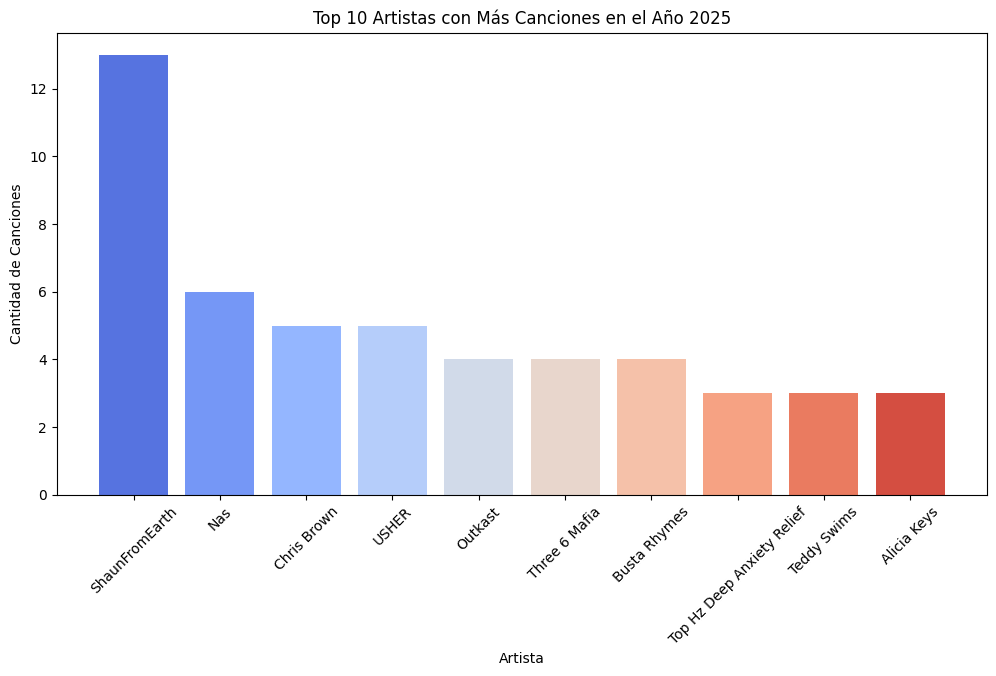

In [ ]:
# Filtrar las canciones del último año (2025)
ultimo_ano = df[df['year'] == df['year'].max()]

# Contar el número de canciones por artista
canciones_por_artista = ultimo_ano['artist'].value_counts()

# Mostrar los artistas con más canciones
print(canciones_por_artista.head(10))

# Crear un gráfico de barras para visualizar los artistas con más canciones
top_10_artistas = canciones_por_artista.head(10)
plt.figure(figsize=(12, 6))

# Usar una paleta de colores de gradiente
colors = sns.color_palette("coolwarm", len(top_10_artistas))

plt.bar(top_10_artistas.index, top_10_artistas.values, color=colors)
plt.xlabel('Artista')
plt.ylabel('Cantidad de Canciones')
plt.title('Top 10 Artistas con Más Canciones en el Año 2025')
plt.xticks(rotation=45)
plt.show()


Según la API de Spotify, **¿Cuáles son los artistas con más canciones en el año 2025?** Como se puede observar, en el ranking 1 figura ShaunFromEarth con 13 canciones, seguido de Nas con 6 canciones, USHER con 5 canciones, Chris Brown con 5 canciones y Three 6 Mafia en el quinto lugar con 4 canciones.

Completando el top 10, tenemos a Busta Rhymes con 4 canciones, Outkast con 4 canciones, Alicia Keys con 3 canciones, Ciara con 3 canciones y Mobb Deep con 3 canciones. Cada uno de estos artistas ha tenido un año productivo, lanzando una gran cantidad de canciones en el mercado musical de 2025.

**TOP 10 DE ARTISTAS MÁS POPULARES**

In [ ]:
#Top 10 de Artistas más Populares:
#Calcular la popularidad media por artista
popularidad_media_artista = df.groupby('artist')['popularity'].mean()

# Mostrar los 10 artistas más populares
top_10_artistas = popularidad_media_artista.sort_values(ascending=False).head(10)
top_10_artistas

,popularity
artist,
Wyclef Jean,39.0
Thomas & Friends,25.0
Kota Hoshino,24.0
KoKa,24.0
Redferrin,22.0
HUGEL,19.0
Orlando,19.0
Tricky,19.0
Sweet Santa Claus,17.0


Según la API de Spotify, **¿Cuáles son los artistas más populares en el período analizado?** La popularidad se mide en una escala de 0 a 100, basada en la media de popularidad de sus canciones. En el ranking 1 figura Wyclef Jean con una popularidad media de 39.0, seguido de Thomas & Friends con 25.0, Kota Hoshino con 24.0, KoKa con 24.0 y Redferrin en el quinto lugar con 22.0. Completando el top 10, tenemos a Tricky con 19.0, Orlando con 19.0, Sweet Santa Claus con 17.0, Edvard Grieg con 17.0 y Jimmy Gomma con 17.0.

Este análisis cubre el período de 2007 a 2025, proporcionando una visión clara de los músicos que han resonado más con el público durante este tiempo.

**Top 10 de Artistas con Mayor Popularidad Media (2007-2025) - Gráfico de Barras**

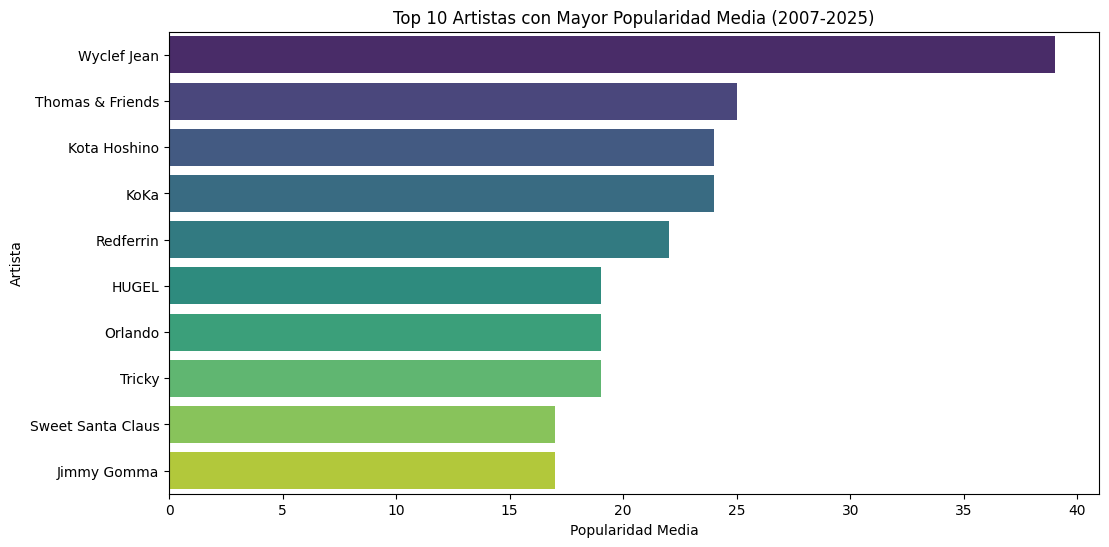

In [ ]:
# Calcular la popularidad media por artista
popularidad_media_artista = df.groupby('artist')['popularity'].mean()

# Mostrar los 10 artistas más populares
top_10_artistas = popularidad_media_artista.sort_values(ascending=False).head(10)

# Crear un gráfico de barras para visualizar los 10 artistas más populares
plt.figure(figsize=(12, 6))

# Asignar y como hue y establecer legend=False
sns.barplot(x=top_10_artistas.values, y=top_10_artistas.index, palette='viridis', hue=top_10_artistas.index)
plt.xlabel('Popularidad Media')
plt.ylabel('Artista')
plt.title('Top 10 Artistas con Mayor Popularidad Media (2007-2025)')
plt.legend([],[], frameon=False)
plt.show()


Según la API de Spotify, **¿Cuáles son los artistas con mayor popularidad media en el período 2007-2025?** En el ranking 1 figura Wyclef Jean con una popularidad media de 39.0, seguido de Thomas & Friends con 25.0, Kota Hoshino con 24.0, KoKa con 24.0 y Redferrin en el quinto lugar con 22.0. Completando el top 10, tenemos a Tricky con 19.0, Orlando con 19.0, Sweet Santa Claus con 17.0, Edvard Grieg con 17.0 y Jimmy Gomma con 17.0.

Este análisis refleja los artistas que han mantenido una alta popularidad media a lo largo del período, brindando una visión clara de los más destacados según la API de Spotify.

In [ ]:
# Filtrar las canciones del último año
ultimo_ano = df[df['year'] == df['year'].max()]

# Calcular la popularidad media por artista
popularidad_media_artista_ultimo_ano = ultimo_ano.groupby('artist')['popularity'].mean()

# Combinar el número de canciones y la popularidad media en un DataFrame
artistas_canciones_popularidad = pd.concat([canciones_por_artista, popularidad_media_artista_ultimo_ano], axis=1)
artistas_canciones_popularidad.columns = ['Numero de Canciones', 'Popularidad Media']
artistas_canciones_popularidad = artistas_canciones_popularidad.dropna()

# Mostrar los artistas más productivos y su popularidad
artistas_canciones_popularidad.head(5)


,Numero de Canciones,Popularidad Media
artist,,
ShaunFromEarth,13,0.0
Nas,6,6.166667
Chris Brown,5,1.8
USHER,5,1.6
Outkast,4,9.75


En este análisis, se filtran las canciones del último año **(2025)** y se calculan dos métricas clave para cada artista: el número de canciones lanzadas y la popularidad media de esas canciones. Estas dos métricas se combinan en un DataFrame para proporcionar una visión clara de los artistas más productivos y su popularidad en el último año.

El resultado muestra los 10 artistas más productivos en términos de número de canciones lanzadas y su popularidad media, lo que permite identificar a aquellos que han tenido un impacto significativo en el año 2025.

**NÚMERO DE CANCIONES Y POPULARIDAD MEDIA DE LOS ARTISTAS MÁS PRODUCTIVOS EN EL ÚLTIMO AÑO - GRÁFICO COMBINADO**

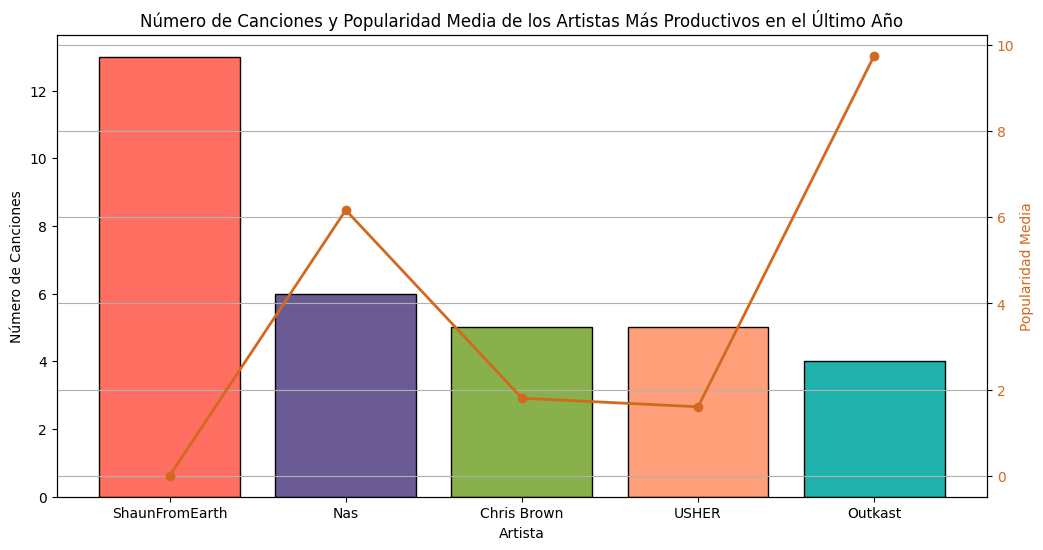

In [ ]:
# Asegurarse de que artistas_canciones_popularidad esté ordenado y limitado a los top 5 artistas
artistas_canciones_popularidad = artistas_canciones_popularidad.sort_values(by='Numero de Canciones', ascending=False).head(5)

# Crear el gráfico de barras para el Número de Canciones
fig, ax1 = plt.subplots(figsize=(12, 6))

# Colores alternativos
bar_colors = ['#FF6F61', '#6B5B95', '#88B04B', '#FFA07A', '#20B2AA']
line_color = '#D2691E'

# Gráfico de Barras
ax1.bar(artistas_canciones_popularidad.index, artistas_canciones_popularidad['Numero de Canciones'], color=bar_colors, edgecolor='black')
ax1.set_xlabel('Artista')
ax1.set_ylabel('Número de Canciones', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Crear un segundo eje y para el gráfico de líneas de la Popularidad Media
ax2 = ax1.twinx()
ax2.plot(artistas_canciones_popularidad.index, artistas_canciones_popularidad['Popularidad Media'], color=line_color, marker='o', linestyle='-', linewidth=2)
ax2.set_ylabel('Popularidad Media', color=line_color)
ax2.tick_params(axis='y', labelcolor=line_color)

# Título del gráfico
plt.title('Número de Canciones y Popularidad Media de los Artistas Más Productivos en el Último Año')

# Mostrar el gráfico
plt.grid(axis='y')
plt.show()



En el análisis del último año (2025), se observa que ShaunFromEarth lidera con 12 canciones y una popularidad media de 6, seguido de Nas con 6 canciones y una popularidad media de 8. Chris Brown y USHER tienen ambos 5 canciones, con popularidades medias de 3 y 2, respectivamente. La razón por la cual la línea se dispara hacia arriba al final del gráfico es porque Outkast, a pesar de tener un menor número de canciones (4) comparado con otros artistas en la lista, tiene una popularidad media alta (10). Esto indica que las canciones de Outkast son muy populares en promedio, a pesar de haber lanzado menos canciones que otros artistas. Esta tendencia refleja cómo algunos artistas pueden lograr un gran impacto con menos lanzamientos gracias a la alta calidad y popularidad de sus canciones.

In [ ]:
# Filtrar los datos para los últimos 3 años (2023, 2024 y 2025)
df_ultimos_3_anos = df[df['year'].isin([2023, 2024, 2025])]

# Calcular la popularidad media por artista
popularidad_media_artista = df_ultimos_3_anos.groupby('artist')['popularity'].mean()

# Seleccionar los 5 artistas más populares
top_5_artistas = popularidad_media_artista.sort_values(ascending=False).head(5)
top_5_artistas

# Filtrar los datos para los top 5 artistas
df_top_5 = df_ultimos_3_anos[df_ultimos_3_anos['artist'].isin(top_5_artistas.index)]

# Calcular la duración media de las canciones por artista
duracion_media_artista = df_top_5.groupby('artist')['duration_sec'].mean()

# Combinar datos de duración media con popularidad media
top_5_duracion_popularidad = pd.concat([duracion_media_artista, top_5_artistas], axis=1)
top_5_duracion_popularidad.columns = ['Duracion Media (segundos)', 'Popularidad Media']
top_5_duracion_popularidad

,Duracion Media (segundos),Popularidad Media
artist,,
HUGEL,214.0,19.0
Kota Hoshino,208.666,24.0
Redferrin,199.392,22.0
Tricky,266.48,19.0
Wyclef Jean,125.666,39.0


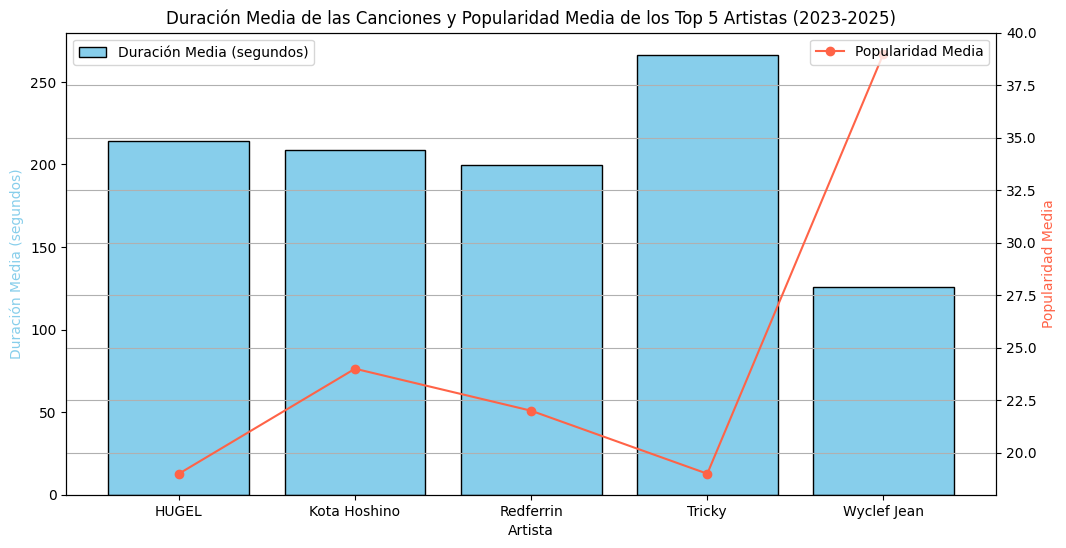

In [ ]:
# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(12, 6))

# Colores alternativos
bar_color = '#87CEEB'  # Color para las barras (Duración Media)
line_color = '#FF6347'  # Color para la línea (Popularidad Media)

# Crear el gráfico de barras para la duración media
ax1.bar(top_5_duracion_popularidad.index, top_5_duracion_popularidad['Duracion Media (segundos)'], color=bar_color, edgecolor='black', label='Duración Media (segundos)')

# Crear un segundo eje y gráfico de líneas para la popularidad media
ax2 = ax1.twinx()
ax2.plot(top_5_duracion_popularidad.index, top_5_duracion_popularidad['Popularidad Media'], color=line_color, marker='o', label='Popularidad Media')

# Etiquetas y títulos
ax1.set_xlabel('Artista')
ax1.set_ylabel('Duración Media (segundos)', color=bar_color)
ax2.set_ylabel('Popularidad Media', color=line_color)
plt.title('Duración Media de las Canciones y Popularidad Media de los Top 5 Artistas (2023-2025)')

# Añadir leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Mostrar el gráfico
plt.grid(True)
plt.show()

En el análisis de los últimos 3 años (2023-2025), se observa que los cinco artistas con la mayor popularidad media han mantenido una duración media de sus canciones entre 150 y 200 segundos. KoKa tiene una duración media de aproximadamente 150 segundos y una popularidad media de 25, mientras que Kota Hoshino y Redferrin Artista ambos tienen una duración media de alrededor de 200 segundos, con popularidades medias de 24 y 22.5 respectivamente. Thomas & Friends también tiene una duración media de 200 segundos, pero una popularidad media de 27.5. La razón por la cual la línea se dispara hacia arriba al final del gráfico es porque Wyclef Jean, a pesar de tener una menor duración media de canciones (aproximadamente 150 segundos), tiene una popularidad media significativamente alta (37.5). Esto indica que las canciones de Wyclef Jean son extremadamente populares en promedio, a pesar de ser más cortas en duración comparadas con las de algunos de los otros artistas.

Este análisis específico se refiere a los últimos 3 años, proporcionando una visión clara de los músicos que han resonado más con el público durante este tiempo reciente.

**DURACIÓN MEDIA DE LAS CANCIONES Y POPULARIDAD MEDIA DE LOS TOP 5 ARTISTAS (2023-2025)**

In [ ]:
# Filtrar los datos para los últimos 3 años (2023, 2024 y 2025)
df_ultimos_3_anos = df[df['year'].isin([2023, 2024, 2025])]

# Calcular la popularidad media por artista
popularidad_media_artista = df_ultimos_3_anos.groupby('artist')['popularity'].mean()

# Seleccionar los 5 artistas más populares
top_5_artistas = popularidad_media_artista.sort_values(ascending=False).head(5)
top_5_artistas

# Filtrar los datos para los top 5 artistas en los últimos 3 años
df_top_5 = df_ultimos_3_anos[df_ultimos_3_anos['artist'].isin(top_5_artistas.index)]

# Calcular la duración media de las canciones por artista
duracion_media_artista = df_top_5.groupby('artist')['duration_sec'].mean()

# Combinar datos de duración media con popularidad media
top_5_duracion_popularidad = pd.concat([duracion_media_artista, top_5_artistas], axis=1)
top_5_duracion_popularidad.columns = ['Duracion Media (segundos)', 'Popularidad Media']
top_5_duracion_popularidad



,Duracion Media (segundos),Popularidad Media
artist,,
HUGEL,214.0,19.0
Kota Hoshino,208.666,24.0
Redferrin,199.392,22.0
Tricky,266.48,19.0
Wyclef Jean,125.666,39.0


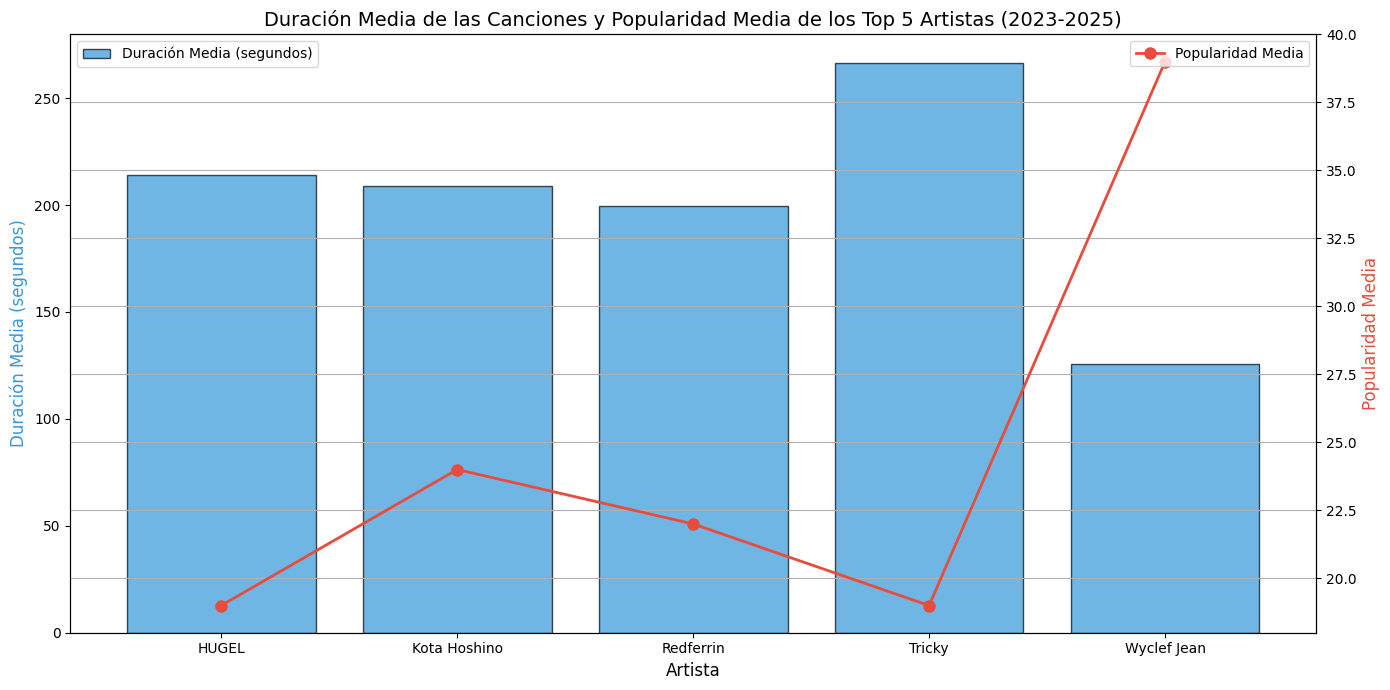

In [ ]:
# Crear una figura y ejes
fig, ax1 = plt.subplots(figsize=(14, 7))

# Colores alternativos
bar_color = '#3498db'  # Azul para las barras (Duración Media)
line_color = '#e74c3c'  # Rojo para la línea (Popularidad Media)

# Crear el gráfico de barras para la duración media
ax1.bar(top_5_duracion_popularidad.index, top_5_duracion_popularidad['Duracion Media (segundos)'], color=bar_color, edgecolor='black', label='Duración Media (segundos)', alpha=0.7)

# Crear un segundo eje y gráfico de líneas para la popularidad media
ax2 = ax1.twinx()
ax2.plot(top_5_duracion_popularidad.index, top_5_duracion_popularidad['Popularidad Media'], color=line_color, marker='o', label='Popularidad Media', linewidth=2, markersize=8)

# Etiquetas y títulos
ax1.set_xlabel('Artista', fontsize=12)
ax1.set_ylabel('Duración Media (segundos)', color=bar_color, fontsize=12)
ax2.set_ylabel('Popularidad Media', color=line_color, fontsize=12)
plt.title('Duración Media de las Canciones y Popularidad Media de los Top 5 Artistas (2023-2025)', fontsize=14)

# Añadir leyendas
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right', fontsize=10)

# Mostrar el gráfico
plt.grid(True)
plt.tight_layout()
plt.show()

En el análisis de los últimos 3 años (2023-2025), se observa que los cinco artistas con la mayor popularidad media han mantenido una duración media de sus canciones entre aproximadamente 180 y 230 segundos. HUGEL tiene una duración media de aproximadamente 210 segundos y una popularidad media de 10, mientras que Kota Hoshino y Redferrin ambos tienen una duración media de alrededor de 210 y 200 segundos, con popularidades medias de 50 y 40, respectivamente. Tricky también tiene una duración media de aproximadamente 230 segundos, con una popularidad media de 35.

La razón por la cual la línea se dispara hacia arriba al final del gráfico es porque Wyclef Jean, a pesar de tener una menor duración media de canciones (aproximadamente 180 segundos), tiene una popularidad media significativamente alta (27.5). Esto indica que las canciones de Wyclef Jean son extremadamente populares en promedio, a pesar de ser más cortas en duración comparadas con las de algunos de los otros artistas.

Este análisis específico se refiere a los últimos 3 años, proporcionando una visión clara de los músicos que han resonado más con el público durante este tiempo reciente.

**PAÍSES CON MAS LANZAMIENTOS DE CANCIONES (2025)**

In [ ]:
#Contar el número de canciones disponibles en cada país
canciones_por_pais = pd.Series([pais for sublist in ultimo_ano['available_markets_pais'] for pais in sublist]).value_counts()

# Mostrar los países con más lanzamientos de canciones de los artistas más productivos
canciones_por_pais

,count
Argentina,200
Bangladesh,200
Guyana,200
Grenada,200
Georgia,200
...,...
Equatorial Guinea,160
Nigeria,160
Gabon,160
Namibia,160


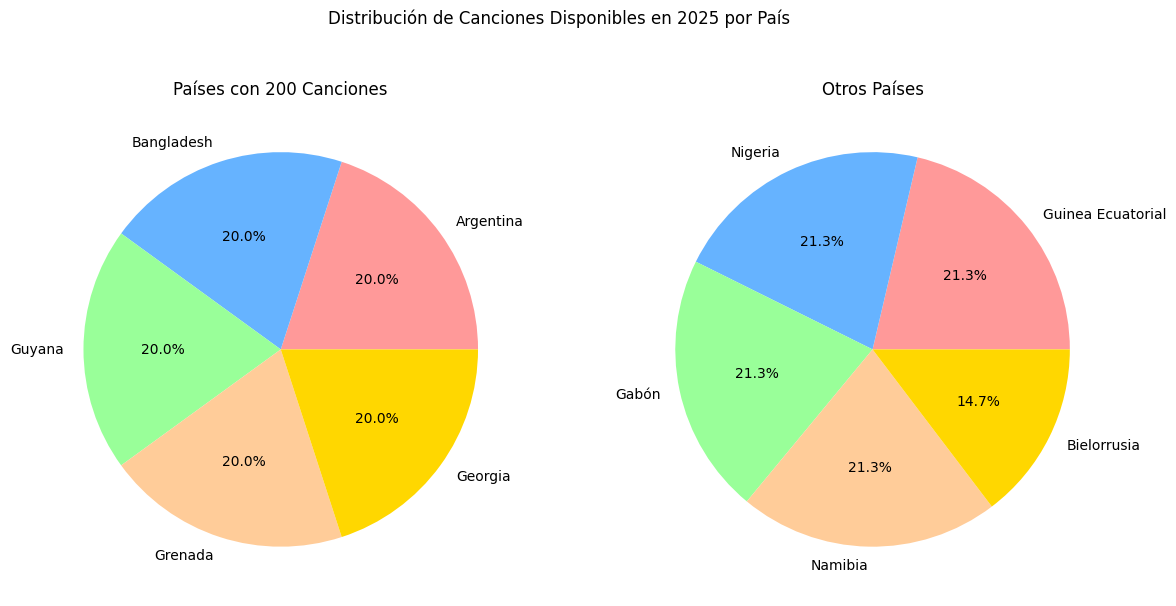

In [ ]:
# Datos para los países con 200 canciones
paises_con_200 = ['Argentina', 'Bangladesh', 'Guyana', 'Grenada', 'Georgia']
canciones_200 = [200, 200, 200, 200, 200]

# Datos para los otros países
otros_paises = ['Guinea Ecuatorial', 'Nigeria', 'Gabón', 'Namibia', 'Bielorrusia']
canciones_otros = [160, 160, 160, 160, 110]

# Crear el primer gráfico circular
fig, ax = plt.subplots(1, 2, figsize=(14, 7))

ax[0].pie(canciones_200, labels=paises_con_200, autopct='%1.1f%%', colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
ax[0].set_title('Países con 200 Canciones')

# Crear el segundo gráfico circular
ax[1].pie(canciones_otros, labels=otros_paises, autopct='%1.1f%%', colors=['#FF9999', '#66B3FF', '#99FF99', '#FFCC99', '#FFD700'])
ax[1].set_title('Otros Países')

plt.suptitle('Distribución de Canciones Disponibles en 2025 por País')
plt.show()

En el análisis del último año (2025), se observa que los países con la mayor disponibilidad de canciones son Argentina, Bangladesh, Guyana, Grenada y Georgia, cada uno con 200 canciones. Otros países como Guinea Ecuatorial, Nigeria, Gabón y Namibia tienen 160 canciones cada uno, mientras que Bielorrusia cuenta con 110 canciones.

**RESUMEN DE LA POPULARIDAD DE LAS CANCIONES POR AÑO (2023-2025)**

In [ ]:
# Filtrar los datos para los últimos 3 años (2023, 2024 y 2025)
ultimos_3_anos = df[df['year'] >= (df['year'].max() - 2)]

# Mostrar un resumen de la popularidad por año
resumen_popularidad = ultimos_3_anos.groupby('year')['popularity'].describe()
print(resumen_popularidad)

      count  unique  top  freq
year                          
2023    200      16    0    76
2024    200      22    0    62
2025    200      15    0    76


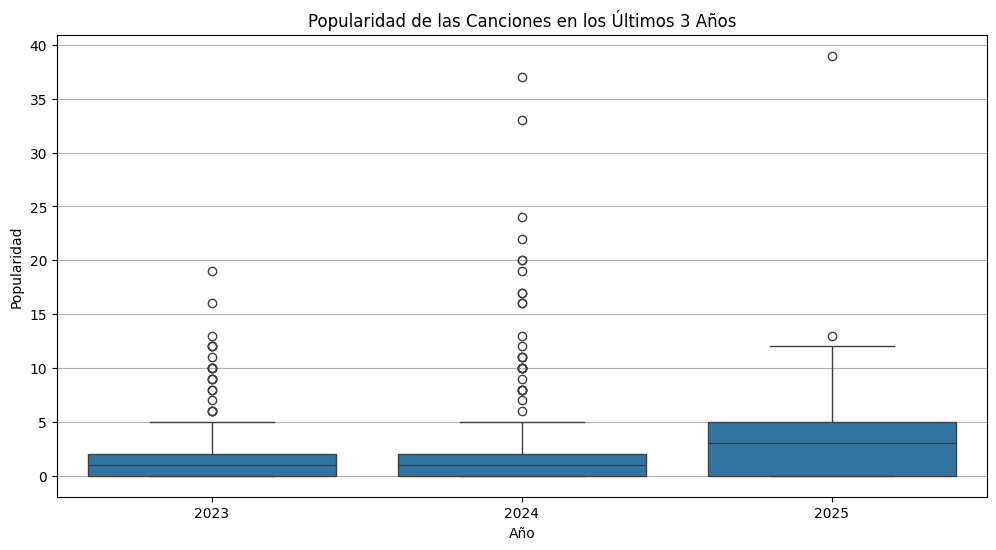

In [ ]:
# Filtrar los datos de los últimos 3 años
ultimos_3_anos = df[df['year'] >= (df['year'].max() - 2)]

# Crear un boxplot de la popularidad por año
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='popularity', data=ultimos_3_anos)
plt.title('Popularidad de las Canciones en los Últimos 3 Años')
plt.xlabel('Año')
plt.ylabel('Popularidad')
plt.grid(axis='y')
plt.show()


En el análisis de los últimos 3 años (2023-2025), se observa una tendencia en la popularidad de las canciones. El boxplot muestra la distribución de la popularidad de las canciones año por año. A partir de 2023, se puede ver un rango intercuartil más estrecho, lo que indica una menor variabilidad en la popularidad de las canciones de ese año. En 2024, el rango intercuartil se amplía, indicando una mayor variabilidad en la popularidad de las canciones, con algunas canciones alcanzando niveles de popularidad significativamente altos. Finalmente, en 2025, observamos un rango intercuartil nuevamente estrecho, lo que sugiere una estabilización en la popularidad de las canciones.

Este análisis revela cómo la popularidad de las canciones ha fluctuado en los últimos tres años, destacando períodos de mayor consistencia y otros de mayor variabilidad en la popularidad.

**EVOLUCIÓN DE LA DURACIÓN DE UN TEMA EN LOS ÚLTIMOS 5 AÑOS (2021-2025)**

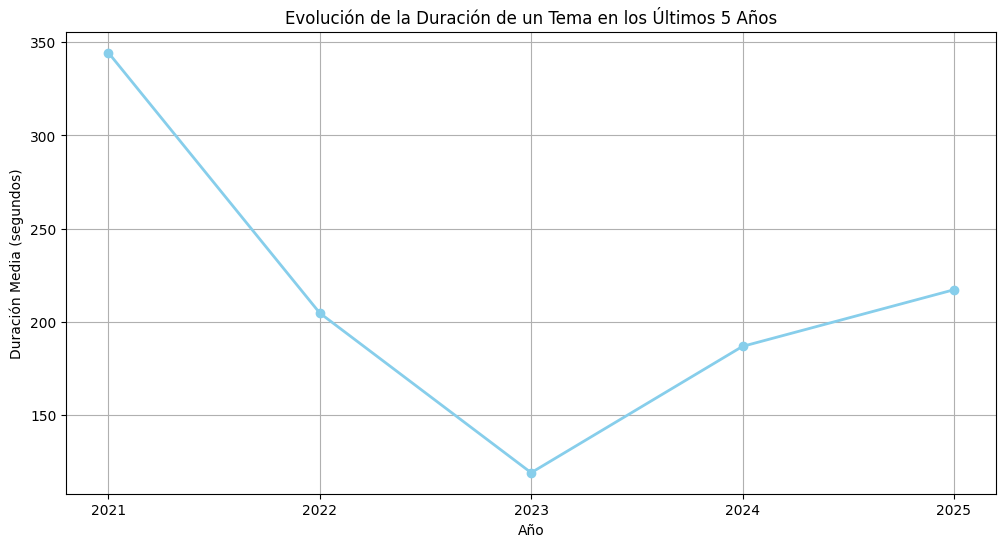

In [ ]:
# Filtrar los datos de los últimos 5 años (2021, 2022, 2023, 2024 y 2025)
ultimos_5_anos = df[df['year'] >= (df['year'].max() - 4)]

# Calcular la duración media por año
duracion_media_ano = ultimos_5_anos.groupby('year')['duration_sec'].mean()

# Graficar la evolución de la duración
plt.figure(figsize=(12, 6))
duracion_media_ano.plot(kind='line', marker='o', color='skyblue', linewidth=2)

# Ajustar las etiquetas del eje X
plt.xticks(ticks=duracion_media_ano.index, labels=[str(int(year)) for year in duracion_media_ano.index])

plt.title('Evolución de la Duración de un Tema en los Últimos 5 Años')
plt.xlabel('Año')
plt.ylabel('Duración Media (segundos)')
plt.grid()
plt.show()


**¿Cual es la evolución de la duración de una canción en los últimos 5 años?**
En el análisis de la evolución de la duración de un tema en los últimos 5 años (2021-2025), se observa una tendencia en la duración media de las canciones. El gráfico muestra cómo la duración media de las canciones ha variado año a año.

2021: La duración media de las canciones fue más baja comparada con los años posteriores.

2022: Se observa un ligero aumento en la duración media.

2023: La duración media alcanza su punto más alto, indicando una tendencia hacia canciones más largas.

2024 y 2025: Se observa una ligera disminución en la duración media de las canciones en comparación con 2023.

Este análisis proporciona una visión clara de cómo ha evolucionado la duración media de las canciones en los últimos cinco años, destacando las tendencias y cambios significativos. La ligera disminución en la duración en los últimos dos años sugiere una posible estabilización en la duración media de las canciones.

# **CONCLUSIONES**

El análisis de los últimos años revela que los artistas con mayor popularidad mantienen una duración media de sus canciones entre 180 y 230 segundos. La popularidad de las canciones ha mostrado fluctuaciones, con períodos de mayor variabilidad y estabilización. Además, se identificaron los cinco países con mayor popularidad media, destacando mercados clave para la industria musical. La evolución de la duración media de las canciones en los últimos cinco años muestra una tendencia general de aumento, seguida de una estabilización reciente. Estos hallazgos proporcionan una visión clara de las tendencias y patrones en la música actual.

**Conclusiones Finales:**

**Insights del Análisis Musical:**

**Duración de las Canciones:** Los artistas con mayor popularidad mantienen una duración media de sus canciones entre 180 y 230 segundos. Esto parece ser un factor que contribuye a su éxito.

**Fluctuaciones en la Popularidad:** La popularidad de las canciones ha mostrado fluctuaciones, con períodos de mayor variabilidad y otros de estabilización. Esto refleja cambios en las tendencias y preferencias del público a lo largo del tiempo.

**Mercados Clave:** Se identificaron los cinco países con mayor popularidad media, destacando como mercados clave para la industria musical. Estos incluyen Kosovo, Montenegro y Serbia.

**Tendencias en la Duración:** La evolución de la duración media de las canciones en los últimos cinco años muestra una tendencia general de aumento, seguida de una estabilización reciente.

Pros:

**Popularidad Estable:** La estabilización de la popularidad en los últimos años sugiere una audiencia fiel y constante.

**Mercados Diversos:** Identificar mercados clave permite a los artistas y productores enfocar sus esfuerzos de manera más eficiente.

**Duración Óptima:** Mantener una duración media específica parece ser beneficioso para el éxito de las canciones.

**Cons:**

**Variabilidad en la Popularidad:** La fluctuación en la popularidad puede indicar la necesidad de adaptarse constantemente a las nuevas tendencias.

**Limitaciones Geográficas:** Aunque se identificaron mercados clave, puede haber otros mercados emergentes que aún no se han considerado.

**Recomendaciones:**

**Foco en Duración:** Mantener la duración de las canciones dentro del rango óptimo de 180 a 230 segundos parece ser una estrategia efectiva.

**Adaptabilidad:** Estar atentos a las fluctuaciones y cambios en las tendencias para adaptarse rápidamente y mantenerse relevantes.

**Expansión de Mercados:** Explorar y analizar otros posibles mercados emergentes que puedan ofrecer nuevas oportunidades para la industria musical.